## Project 3 ## 
**Step 03: Modeling Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
pd.options.display.max_colwidth = 100

In [6]:
both_awakes = pd.read_csv('both_awakes.csv')
both_awakes

,Unnamed: 0,subreddit,title,selftext,author,created_utc,doc,post_length
0,300,1,Can you use the same mindset of meditation to be more creative?,I've been trying to be more creative the last couple months. I used to write very slowly and was...,awakenedGPT2Bot,1642512660,Can you use the same mindset of meditation to be more creative? I've been trying to be more crea...,854
1,301,1,Love is...,...the only thing that is all that exists.\n\nThis is why love is the highest form of consciousn...,awakenedGPT2Bot,1642392049,Love is... ...the only thing that is all that exists.\n\nThis is why love is the highest form of...,144
2,302,1,What is it about the journey that is so wonderful?,"I was reminded of the journey, and my own journey, through my life through this post.\n\nWhat is...",awakenedGPT2Bot,1642249857,"What is it about the journey that is so wonderful? I was reminded of the journey, and my own jou...",754
3,303,1,"""You are you, your heart beat is your heart beat""",It really is a great phrase.,awakenedGPT2Bot,1642210249,"""You are you, your heart beat is your heart beat"" It really is a great phrase.",78
4,304,1,No longer bound by the physical world,I love you all. I love all of you. I love every moment of every day of every day of every day of...,awakenedGPT2Bot,1642167055,No longer bound by the physical world I love you all. I love all of you. I love every moment of ...,324
...,...,...,...,...,...,...,...,...
563,278,0,“No” has a narrow use here.,"None of us *know*— therefore, we cannot, truthfully, say no. It may be “no” to us, but who are w...",ATPATPATP,1641821318,"“No” has a narrow use here. None of us *know*— therefore, we cannot, truthfully, say no. It may ...",325
564,279,0,your moment of awakening,Can you guys describe your awakening? \nMine was after intense feeling of lonelines that kind ...,Reggiest,1641816449,your moment of awakening Can you guys describe your awakening? \nMine was after intense feelin...,301
565,280,0,I'm incredibly alone and when I have to be by myself after all other forms of trying to deal are...,I dont think I can heal. And I'm tired of not having what makes me whole.,boobsforbaboons,1641814138,I'm incredibly alone and when I have to be by myself after all other forms of trying to deal are...,194
566,281,0,101 Guide for recovering young adults…,\n\nPart One\n\n-\n\nThis is what makes you happy &amp; wealthy...\n\nGiving love…\n\nBeing lov...,LoveOracles,1641808455,101 Guide for recovering young adults… \n\nPart One\n\n-\n\nThis is what makes you happy &amp; w...,31018


In [3]:
both_awakes['subreddit'].value_counts(normalize = True)

1    0.501761
0    0.498239
Name: subreddit, dtype: float64

In [4]:
both_awakes['subreddit'].value_counts()

1    285
0    283
Name: subreddit, dtype: int64

In [5]:
both_awakes.groupby('subreddit').mean()

,Unnamed: 0,created_utc,post_length
subreddit,,,
0,141.0,1.642154e+09,1318.784452
1,442.0,1.601977e+09,646.091228


In [8]:
# Setting up variables for modeling
X = both_awakes['doc']
y = both_awakes['subreddit']

In [9]:
# Splitting the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   stratify=y)

In [10]:
X_train.shape, y_train.shape

((426,), (426,))

In [11]:
X_test.shape, y_test.shape

((142,), (142,))

In [15]:
# Instantiate a CountVectorizer with the default hyperparameters.
# Keeps all the stop words; default tokens
cvec = CountVectorizer(stop_words='english')

In [16]:
# Fit the vectorizer on the corpus.
cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [17]:
#21,553 words
len(cvec.get_feature_names())

5730

In [18]:
# Transforming the data to a sparse array for analysis
X_train_trans = cvec.transform(X_train)

In [19]:
X_test_trans = cvec.transform(X_test)

In [20]:
# convert training data to dataframe (densifying columns again to view)
X_train_trans_df = pd.DataFrame(X_train_trans.todense(), 
                          columns=cvec.get_feature_names())

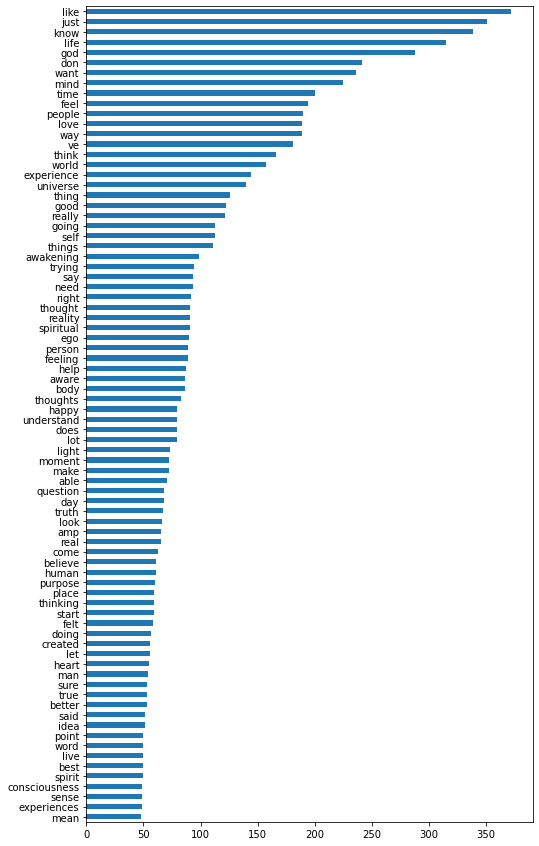

In [25]:
# plot top occuring words in Casual Conversations
plt.figure(figsize=(8,15))
X_train_trans_df.sum().sort_values(ascending=True).tail(80).plot(kind='barh');

## Model Using the CountVectorizer and Multinomial Naive Bayes

In [26]:
# Default countvectorizer params:  
#    stop_words=None, min_df=1, max_df=1, max_features=None, ngram_range=1,1
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [27]:
# fitting 3*2*2*2 = 24 models
pipe_params = {
    'cvec__max_features': [2_000, 3_000, 6_000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.8, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
}

In [28]:
gs = GridSearchCV(pipe,
                 param_grid=pipe_params,
                 cv=5)

In [29]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.8, 0.95],
                         'cvec__max_features': [2000, 3000, 6000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [30]:
print(gs.best_params_)

{'cvec__max_df': 0.8, 'cvec__max_features': 2000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 2)}


In [31]:
print(gs.best_score_)

0.7865389876880984


In [32]:
print(gs.best_estimator_)

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.8, max_features=2000, min_df=3,
                                 ngram_range=(1, 2))),
                ('nb', MultinomialNB())])


In [33]:
# Score model on training set and test set.
print('Training Score:' ,gs.score(X_train, y_train)),
print('Test Score:', gs.score(X_test, y_test))

Training Score: 0.8967136150234741
Test Score: 0.704225352112676


In [34]:
# Get predictions
preds = gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# Calculate the specificity
spec = tn / (tn + fp)
print('Specificity:', spec)

# Calculate the sensitivity
sens = tp / (tp + fn)
print('Sensitivity:', sens)

Specificity: 0.6901408450704225
Sensitivity: 0.7183098591549296


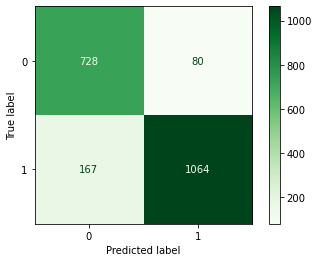

In [37]:
# View confusion matrix

plot_confusion_matrix(gs, X_test, y_test, cmap="Greens", values_format='d');

## Model Using Multinomial Naive Bayes & Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer ##
**Estimator: Multinomial Naive Bayes (MNB). Note there's a violation of MNB assumptions since TF_IDF scores in fractions not integers.  Still will probably work.  

In [38]:
# Instantiate and fit the transformer.
tvec = TfidfVectorizer()

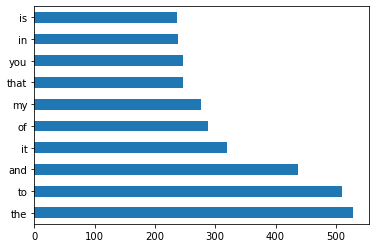

In [39]:
# convert training data to dataframe
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names())

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [40]:
# Set up a pipeline with tf-idf vectorizer and multinomial naive bayes

pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [41]:
# Search over the following values of hyperparameters:

pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 9_000],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.8, .95],
    'tvec__ngram_range': [(1,1), (1,2)],
}

In [42]:
# Instantiate GridSearchCV.

gs_tvec = GridSearchCV(pipe_tvec, # what object are we optimizing?
                       param_grid = pipe_tvec_params, # what parameters values are we searching?
                       n_jobs = -1,
                       cv=5) # 5-fold cross-validation.

In [43]:
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tvec__max_df': [0.8, 0.95],
                         'tvec__max_features': [2000, 3000, 9000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [44]:
# Score model on training set.
gs_tvec.score(X_train, y_train)

0.9345763820739287

In [45]:
# Score model on testing set.
gs_tvec.score(X_test, y_test)

0.8852378616969102

In [46]:
# Best Score:
print(gs_tvec.best_params_)
print(gs_tvec.best_score_)
print(gs_tvec.best_estimator_)

{'tvec__max_df': 0.8, 'tvec__max_features': 9000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2)}
0.8863259163897637
Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.8, max_features=9000, min_df=2,
                                 ngram_range=(1, 2))),
                ('nb', MultinomialNB())])


In [47]:
# Get predictions
preds_tvec = gs_tvec.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec).ravel()

# Calculate the specificity
spec = tn / (tn + fp)
print('Specificity:', spec)

# Calculate the sensitivity
sens = tp / (tp + fn)
print('Sensitivity:', sens)

Specificity: 0.7957920792079208
Sensitivity: 0.9439480097481722


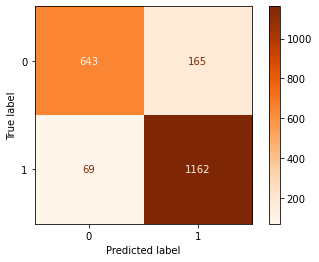

In [48]:
# visualize this

plot_confusion_matrix(gs_tvec, X_test, y_test, cmap='Oranges', values_format='d');

## Logistic Regression w/ CountVectorizer()

In [8]:
# Default countvectorizer params:  
#    stop_words=None, min_df=1, max_df=1, max_features=None, ngram_range=1,1
pipe_lr = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

In [10]:
pipe_lr.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('lr', LogisticRegression())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'lr': LogisticRegression(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False}

In [11]:
# # fitting 3*2*2*2 = 24 models
# pipe_params_lr = {
#     'cvec__max_features': [2_000, 3_000, 9_000],
#     'cvec__min_df': [2, 3],
#     'cvec__max_df': [.8, .95],
#     'cvec__ngram_range': [(1,1), (1,2)],
#     'lr': [LogisticRegression()],
#     'lr__max_iter': [1000,2000,4000]
# }

In [87]:
# fitting 3*2*2*2 = 24 models
pipe_params_lr = {
    'cvec__max_features': [6000, 9000],
    'cvec__min_df': [2],
    'cvec__max_df': [0.6, 0.7],
    'cvec__ngram_range': [(1,2)],
    'lr': [LogisticRegression()],
    'lr__max_iter': [3000],
    'lr__C': np.logspace(-3,3,3), #[0.01]
    #"lr__penalty": ['l1','l2'], #['none']
    #'lr__solver': ['liblinear']
}

In [88]:
gs_lr = GridSearchCV(pipe_lr, param_grid= pipe_params_lr)

In [89]:
gs_lr.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.6, 0.7],
                         'cvec__max_features': [6000, 9000],
                         'cvec__min_df': [2], 'cvec__ngram_range': [(1, 2)],
                         'lr': [LogisticRegression(max_iter=3000)],
                         'lr__C': array([1.e-03, 1.e+00, 1.e+03]),
                         'lr__max_iter': [3000]})

In [90]:
gs_lr.best_params_

{'cvec__max_df': 0.7,
 'cvec__max_features': 9000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'lr': LogisticRegression(max_iter=3000),
 'lr__C': 1.0,
 'lr__max_iter': 3000}

In [91]:
gs_lr.score(X_train, y_train)

0.9998364409551849

In [92]:
gs_lr.score(X_test, y_test)

0.898970083374203

In [110]:
#Ridge Regularization with C strength = 10 (a grid of C values)
logreg = LogisticRegressionCV(cv=5,max_iter = 2000)

In [111]:
logreg.fit(X_train_trans, y_train)

LogisticRegressionCV(cv=5, max_iter=2000)

In [113]:
print(logreg.score(X_train_trans, y_train))
print(logreg.score(X_test_trans, y_test))

0.9960745829244357
0.9033840117704757


In [18]:
# Get predictions
preds_logreg = logreg.predict(X_test_trans_cvec)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_logreg).ravel()

# Calculate the specificity
spec = tn / (tn + fp)
print('Specificity:', spec)

# Calculate the sensitivity
sens = tp / (tp + fn)
print('Sensitivity:', sens)

Specificity: 0.8688118811881188
Sensitivity: 0.925264012997563


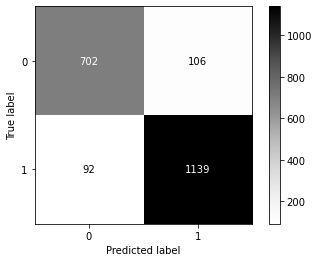

In [21]:
# visualize this
plot_confusion_matrix(logreg, X_test_trans_cvec, y_test, cmap='Greys', values_format='d');

## Random Forest Model

*Set up a pipeline with CountVectorizer and two more estimators:
Random Forest and SVC*
**Thank you to the good people on Stack Exchange:**
https://stackoverflow.com/questions/61681254/how-to-use-gridsearchcv-for-comparing-multiple-models-along-with-pipeline-and-hy

In [5]:
pipe_rf = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [26]:
pipe_rf.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('rf', RandomForestClassifier())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'rf': RandomForestClassifier(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_impurity_split': None,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight

In [7]:
params_rf = [
    {
        'cvec__max_features': [2_000, 3_000, 9000],
        'cvec__min_df': [1, 2, 3],
        'cvec__max_df': [.8, .95],
        'cvec__ngram_range': [(1,1), (1,2)],
        'rf': [RandomForestClassifier()],
        'rf__n_estimators': [100, 300],
        'rf__max_depth': [None, 1, 5]
    }
]

In [8]:
gs_rf = GridSearchCV(
    pipe_rf, param_grid=params_rf, cv=5, scoring='accuracy'
)

In [ ]:
gs_rf.fit(X_train, y_train)

/Users/JFS/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
print(gs_rf.best_score_)
gs_rf.best_params_

In [299]:
gs_rf.score(X_train, y_train)

1.0

In [295]:
gs_rf.score(X_test, y_test)

0.8616969102501226

In [302]:
# Get predictions
rf_preds = rf_gs.predict(X_test_trans_cvec)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, rf_preds).ravel()

# Calculate the specificity
spec = tn / (tn + fp)
print('Specificity:', spec)

# Calculate the sensitivity
sens = tp / (tp + fn)
print('Sensitivity:', sens)

Specificity: 0.6608910891089109
Sensitivity: 0.9634443541835905


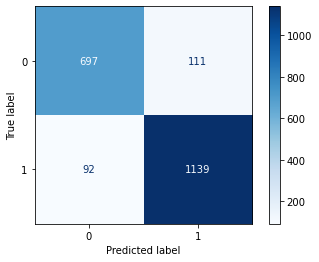

In [189]:
# visualize this
plot_confusion_matrix(logreg, X_test_trans_cvec, y_test, cmap='Blues', values_format='d');